# SEDA DATA


### https://edopportunity.org/get-the-data/seda-archive-downloads/

In [1]:
# Calling all the packages in python
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view

### 1.Retrieving Data from SEDA

In [2]:
# Path
SEDA = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_cov_school_poolyr_4.0.csv",converters={"sedasch":str})

In [3]:
SEDA.sedasch=SEDA.sedasch.str.rjust(12, "0")

In [4]:
# First 5 observations 
SEDA.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
0,010000500870,2009,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.066071,0.546429,0.547237,"Town, Fringe",NaN,NaN,NaN,NaN,NaN,280.0
1,010000500870,2010,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.073864,0.606061,0.588803,"Town, Distant",NaN,NaN,NaN,NaN,NaN,263.0
2,010000500870,2011,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.049296,0.647887,0.643357,"Town, Distant",NaN,NaN,NaN,NaN,NaN,284.0
3,010000500870,2012,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.082237,0.644737,0.641322,"Town, Distant",0.099836,0.08838,0.081833,0.0,0.0,303.5
4,010000500870,2013,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.057096,0.601958,0.633058,"Town, Distant",NaN,NaN,NaN,NaN,NaN,306.5


In [5]:
# Checking the type of dataframe
type(SEDA)

pandas.core.frame.DataFrame

In [6]:
SEDA.shape

(746823, 31)

## 2. Key Observations  
### Total Number of observations in SEDA
SEDA data has 746823 entries.
### Variables
Contains a total of 31 variables.
### Time period covered by SEDA
Years = (2009 to 2018)


In [7]:
# List of all the 31 items in the columns
SEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746823 entries, 0 to 746822
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sedasch         746823 non-null  object 
 1   year            746823 non-null  int64  
 2   schnam          746823 non-null  object 
 3   schcity         746810 non-null  object 
 4   sedalea         746823 non-null  int64  
 5   fips            746823 non-null  int64  
 6   stateabb        746823 non-null  object 
 7   type            746810 non-null  object 
 8   level           746609 non-null  object 
 9   mingrd          740278 non-null  float64
 10  maxgrd          740278 non-null  float64
 11  charter         746810 non-null  float64
 12  magnet          746810 non-null  float64
 13  urbanicity      746483 non-null  object 
 14  totenrl         746823 non-null  float64
 15  perwht          746823 non-null  float64
 16  perind          746823 non-null  float64
 17  perasn    

## 3. Data Preparation 

### 3.1 Cross-Sectional Data
Conversion to Cross-sectional for year = 2018 

In [8]:
SEDA_new = SEDA[SEDA.year == 2018]
SEDA_new.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
9,010000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.064436,0.706320,0.386534,"Town, Distant",0.091698,0.065675,0.060719,0.000000,0.0,403.50
19,010000500879,2018,Evans Elementary School,Albertville,100005,1,AL,Regular School,Middle,5.0,...,0.042353,0.715294,0.431765,"Town, Distant",0.121780,0.121780,0.110070,0.100703,0.0,425.00
29,010000500889,2018,Albertville Elementary School,Albertville,100005,1,AL,Regular School,Elementary,3.0,...,0.045254,0.754967,0.451720,"Town, Distant",0.334437,0.086093,0.086093,0.088300,0.0,453.00
39,010000600193,2018,Kate Duncan Smith DAR Middle,Grant,100006,1,AL,Regular School,Middle,5.0,...,0.087760,0.554273,0.569124,"Rural, Distant",0.007177,0.153110,0.136364,0.071770,0.0,108.25
49,010000600872,2018,Asbury High School,Albertville,100006,1,AL,Regular School,High,3.0,...,0.081784,0.836431,0.898113,"Rural, Distant",0.069470,0.160878,0.157221,0.000000,0.0,88.00


In [9]:
SEDA_new.shape

(73345, 31)

In [10]:
SEDA_new.sedasch = SEDA_new.sedasch.astype(str)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Note: The total number of observations goes down 73345 and contains only observations for the year 2018.**


In [11]:
SEDA_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73345 entries, 9 to 746822
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sedasch         73345 non-null  object 
 1   year            73345 non-null  int64  
 2   schnam          73345 non-null  object 
 3   schcity         73345 non-null  object 
 4   sedalea         73345 non-null  int64  
 5   fips            73345 non-null  int64  
 6   stateabb        73345 non-null  object 
 7   type            73345 non-null  object 
 8   level           73144 non-null  object 
 9   mingrd          72772 non-null  float64
 10  maxgrd          72772 non-null  float64
 11  charter         73345 non-null  float64
 12  magnet          73345 non-null  float64
 13  urbanicity      73345 non-null  object 
 14  totenrl         73345 non-null  float64
 15  perwht          73345 non-null  float64
 16  perind          73345 non-null  float64
 17  perasn          73345 non-null

### 3.2 GeoDataFrame
Conversion to Geodataframe

In [12]:
# Since SEDA has no geometry hence we need a index to convert the data into geodataframe
df_sedasch =SEDA_new[['sedasch', 'schnam', 'year']] # trying to determine the index.

In [13]:
df_sedasch.head()

,sedasch,schnam,year
9,010000500870,Albertville Middle School,2018
19,010000500879,Evans Elementary School,2018
29,010000500889,Albertville Elementary School,2018
39,010000600193,Kate Duncan Smith DAR Middle,2018
49,010000600872,Asbury High School,2018


### Schools data from NCES

In [14]:

schools = gpd.read_parquet("s3://spatial-ucr/nces/schools/schools_1819.parquet")


In [15]:
schools.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20617 34.26019)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20488 34.26223)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22014 34.27332)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22181 34.25270)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.19329 34.28985)


In [16]:
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102176 entries, 0 to 102175
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   NCESSCH     102176 non-null  object  
 1   LEAID       102176 non-null  object  
 2   NAME        102176 non-null  object  
 3   OPSTFIPS    102176 non-null  object  
 4   STREET      102176 non-null  object  
 5   CITY        102176 non-null  object  
 6   STATE       102176 non-null  object  
 7   ZIP         102176 non-null  object  
 8   STFIP       102176 non-null  object  
 9   CNTY        102176 non-null  object  
 10  NMCNTY      102176 non-null  object  
 11  LOCALE      102176 non-null  object  
 12  LAT         102176 non-null  float64 
 13  LON         102176 non-null  float64 
 14  CBSA        102176 non-null  object  
 15  NMCBSA      102176 non-null  object  
 16  CBSATYPE    102176 non-null  object  
 17  CSA         102176 non-null  object  
 18  NMCSA       1021

<AxesSubplot:>

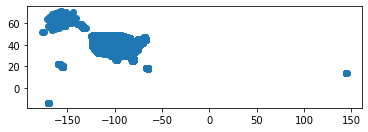

In [17]:
schools.plot()

In [18]:
sch_geoms = schools[['NCESSCH','geometry']]

In [19]:
sch_geoms

,NCESSCH,geometry
0,010000500870,POINT (-86.20617 34.26019)
1,010000500871,POINT (-86.20488 34.26223)
2,010000500879,POINT (-86.22014 34.27332)
3,010000500889,POINT (-86.22181 34.25270)
4,010000501616,POINT (-86.19329 34.28985)
...,...,...
102171,780003000025,POINT (-64.96793 18.34456)
102172,780003000026,POINT (-64.95248 18.33874)
102173,780003000027,POINT (-64.89902 18.35478)
102174,780003000033,POINT (-64.94594 18.33666)


In [20]:
# Merge the SEDA_new to NCES index
SEDA_2018 = SEDA_new.merge(sch_geoms, left_on="sedasch", right_on= "NCESSCH")

In [21]:
type(SEDA_2018)

pandas.core.frame.DataFrame

In [22]:
# Converting the data into GeoDataFrame
SEDA_2018= gpd.GeoDataFrame(SEDA_2018)

In [23]:
SEDA_2018.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall,NCESSCH,geometry
0,010000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.386534,"Town, Distant",0.091698,0.065675,0.060719,0.000000,0.0,403.50,010000500870,POINT (-86.20617 34.26019)
1,010000500879,2018,Evans Elementary School,Albertville,100005,1,AL,Regular School,Middle,5.0,...,0.431765,"Town, Distant",0.121780,0.121780,0.110070,0.100703,0.0,425.00,010000500879,POINT (-86.22014 34.27332)
2,010000500889,2018,Albertville Elementary School,Albertville,100005,1,AL,Regular School,Elementary,3.0,...,0.451720,"Town, Distant",0.334437,0.086093,0.086093,0.088300,0.0,453.00,010000500889,POINT (-86.22181 34.25270)
3,010000600193,2018,Kate Duncan Smith DAR Middle,Grant,100006,1,AL,Regular School,Middle,5.0,...,0.569124,"Rural, Distant",0.007177,0.153110,0.136364,0.071770,0.0,108.25,010000600193,POINT (-86.25409 34.53372)
4,010000600872,2018,Asbury High School,Albertville,100006,1,AL,Regular School,High,3.0,...,0.898113,"Rural, Distant",0.069470,0.160878,0.157221,0.000000,0.0,88.00,010000600872,POINT (-86.14202 34.36255)


In [24]:
type(SEDA_2018)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

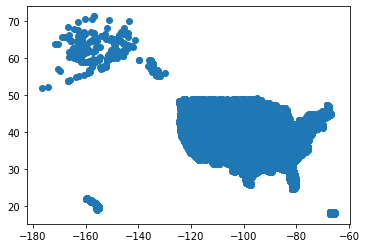

In [25]:
SEDA_2018.plot()

In [26]:
# Subset of the california schools from the US data
cal_sch = SEDA_2018[SEDA_2018.stateabb == "CA"]

In [27]:
# First 5 observations of the data
cal_sch.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall,NCESSCH,geometry
3493,060000107534,2018,Meadowlark Elementary,Acton,600001,6,CA,Regular School,Elementary,3.0,...,0.555085,"Rural, Distant",0.200000,0.174419,0.167442,0.000000,0.0,79.333336,060000107534,POINT (-118.18562 34.47432)
3494,060000109444,2018,High Desert,Acton,600001,6,CA,Regular School,Middle,5.0,...,0.543726,"Rural, Fringe",0.155477,0.286219,0.257951,0.028269,0.0,92.666664,060000109444,POINT (-118.19474 34.49137)
3495,060000113828,2018,Albert Einstein Acad Ltrs Arts Scis - Aqua Dul...,Agua Dulce,600001,6,CA,Regular School,Other,3.0,...,0.282353,"Rural, Fringe",NaN,NaN,NaN,NaN,NaN,14.500000,060000113828,POINT (-118.33198 34.48820)
3496,060000608773,2018,Manor Elementary,Fairfax,600006,6,CA,Regular School,Elementary,3.0,...,0.159420,"Suburb, Large",0.046693,0.136187,0.116732,0.000000,0.0,45.666668,060000608773,POINT (-122.59403 37.99720)
3497,060000608774,2018,White Hill Middle,Fairfax,600006,6,CA,Regular School,Middle,6.0,...,0.118321,"Suburb, Large",0.007407,0.135802,0.107407,0.000000,0.0,269.333340,060000608774,POINT (-122.60640 38.00312)


<AxesSubplot:>

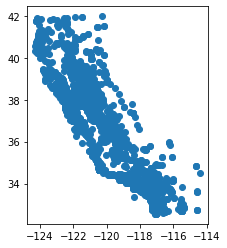

In [28]:
cal_sch.plot()

<AxesSubplot:>

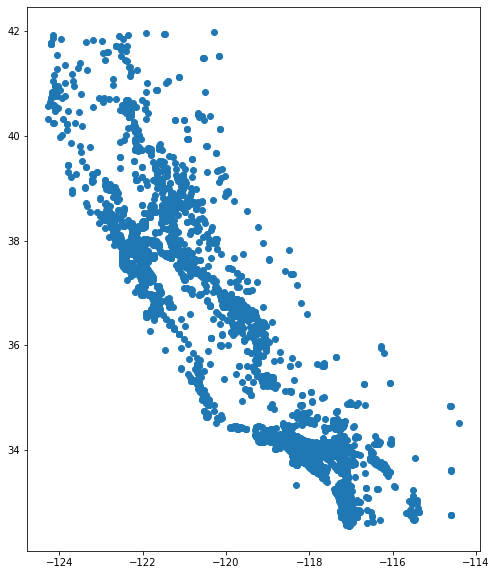

In [29]:
# Making the plot bigger
fig, ax = plt.subplots(figsize=(10,10))
cal_sch.plot(ax=ax)


## For the cells in the next few lines remove hashtag to run the code

In [30]:
# Remove hashtag to run the cell


#fig, ax = plt.subplots(figsize=(20,20))
#cal_sch.to_crs(3857).plot(ax=ax, alpha=0.5)
#ctx.add_basemap(ax=ax)

In [31]:
# Viewing perblk which is the percentage of black students.

# view(cal_sch, column='perblk', scheme='quantiles', k=6)

In [32]:
# view(cal_sch, marker_type='circle_marker', marker_kwds={'radius':10, "color":"blue", "fill":True}, popup='schnam')

In [33]:
# Looking at variable avgrdall

# view(cal_sch, column='avgrdall', tooltip='avgrdall', scheme='quantiles', k=5, legend=True, cmap='Reds')

# EJSCREEN DATA


In [34]:

import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("epa/ejscreen/ejscreen_2020.parquet", "./ejscreen_2020.parquet")


100%|██████████| 146M/146M [00:05<00:00, 29.1MB/s] 


In [35]:
ejscreen = pd.read_parquet('ejscreen_2020.parquet')
ejscreen

,OBJECTID,ID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,1,010010201001,636,636,418,294,294,104,0.163522,245,...,36.8 ppb (15%ile),54%ile,9.69 ug/m3 (86%ile),52%ile,4259428.0,28435.0,0,0,13443.155206,6.040790e+06
1,2,010010201002,1287,1287,885,471,485,278,0.216006,210,...,36.8 ppb (15%ile),36%ile,9.69 ug/m3 (86%ile),28%ile,5558385.0,0.0,0,0,11917.089598,7.834160e+06
2,3,010010202001,810,802,568,322,370,548,0.676543,402,...,36.8 ppb (16%ile),70%ile,9.71 ug/m3 (86%ile),72%ile,2058380.0,0.0,0,0,7770.915121,2.900774e+06
3,4,010010202002,1218,1016,875,397,482,670,0.550082,400,...,36.8 ppb (16%ile),67%ile,9.71 ug/m3 (86%ile),69%ile,1267299.0,5669.0,0,0,6506.804784,1.793332e+06
4,5,010010203001,2641,2641,1849,948,1049,899,0.340401,814,...,36.9 ppb (16%ile),51%ile,9.75 ug/m3 (86%ile),48%ile,3866515.0,9054.0,0,0,11070.367848,5.461602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,220329,721537506011,699,699,511,250,502,699,1.000000,631,...,None,None,None,None,7628406.0,4527.0,0,0,19751.958143,8.486394e+06
220329,220330,721537506012,2432,2432,1555,670,1025,2432,1.000000,1906,...,None,None,None,None,1569471.0,0.0,0,0,6704.079316,1.744950e+06
220330,220331,721537506013,976,976,552,231,416,976,1.000000,758,...,None,None,None,None,1789160.0,0.0,0,0,7737.485130,1.989274e+06
220331,220332,721537506021,1707,1689,1481,573,849,1707,1.000000,1465,...,None,None,None,None,1136084.0,1997.0,0,0,5128.437876,1.265271e+06


In [36]:
blockgroups = gpd.read_parquet("s3://spatial-ucr/census/acs/acs_2018_bg.parquet")

In [37]:
bg_geoms = blockgroups[['geometry']]

In [45]:

ejscreen = ejscreen.merge(bg_geoms, left_on="ID", right_index=True)

In [46]:
type(ejscreen)

pandas.core.frame.DataFrame

In [47]:
ejscreen = gpd.GeoDataFrame(ejscreen)

In [48]:
type(ejscreen)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

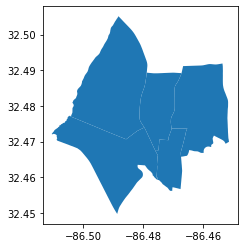

In [49]:
ejscreen.head().plot()

In [59]:
# Subset of EJscreen to only California 
CA_ej = ejscreen[ejscreen['ID'].str.startswith('06')]

<AxesSubplot:>

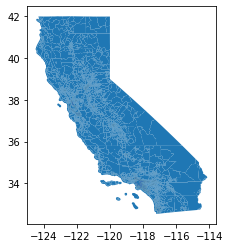

In [60]:
CA_ej.plot()

In [61]:
# To check what CA_ej contains the columns and observations.
CA_ej.shape

(23212, 142)

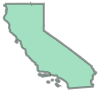

In [62]:
CA_ej.unary_union

In [63]:
cal_schools = cal_sch[cal_sch.intersects(CA_ej.unary_union)]

<AxesSubplot:>

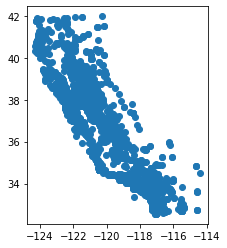

In [64]:
cal_schools.plot()

### NCES School Districts

In [41]:
districts = gpd.read_parquet("s3://spatial-ucr/nces/districts/school_districts_1819.parquet")

In [42]:

cal_districts = districts[districts.STATEFP == "06"]

In [43]:
cal_districts.shape


(981, 19)

<AxesSubplot:>

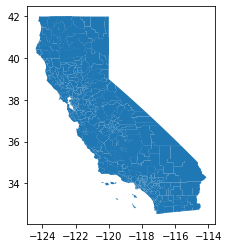

In [44]:
cal_districts.plot()